### k-means Tutorial
### Based on this tutorial we will try to cluster various microstructure images.
### Source: https://www.unioviedo.es/compnum/labs/new/kmeans.html

In [130]:
%matplotlib inline

In [131]:
import numpy as np
import matplotlib.pyplot as plt
print(np.ones(100)) # This will cresate a 100 x 1 array of 1s.
print(np.ones((100,2))) # This will cresate a 100 x 2 array of 1s.
print(np.random.standard_normal((100,2))) # this will create 100 values 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 

In [132]:
#np.random.seed(7)
x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
# More about function np.random.standard_normal(100).
# This function will draw random numbers from a standard normal distribution with mean=0 and stdev=1.
# (100,2) means that a matrix of 100 x 2 will be created.
# But multiplication with 0.6 will introduce Standard Deviation = 0.6.
# Addition with np.ones(100,2) will move the mean to 1.0
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html
print(x1)

[[ 1.37273967  0.45689694]
 [ 0.9436333   2.34641015]
 [-0.04623075  0.71160349]
 [ 0.91237815  1.69578862]
 [ 1.74016452  1.06574422]
 [ 1.71258328  1.25055391]
 [ 0.77611238  0.88732484]
 [ 1.32418499  1.94195987]
 [ 1.58805345  0.5722117 ]
 [ 2.14674766  1.77112592]
 [ 0.19544712 -0.08795837]
 [ 1.58507084  0.72136155]
 [ 1.18382298  0.82393057]
 [ 1.11876843  0.81028358]
 [ 0.69630668 -0.50367086]
 [ 1.64452535  0.44074225]
 [ 1.78064185  1.35265761]
 [ 1.63913118  1.39087151]
 [ 1.26039019  1.9332817 ]
 [-0.1773366   1.41207415]
 [ 1.33954941  1.85298432]
 [ 0.87240388  0.96060541]
 [ 1.13991675  0.62321689]
 [ 1.50183092  0.75816803]
 [ 1.17287517  0.97261855]
 [ 1.24426466  1.43442738]
 [ 0.7998214   0.48409714]
 [ 1.28607903  1.76620537]
 [ 0.69650668  1.04114445]
 [ 1.38600377  0.72942006]
 [ 0.78028212  1.01409959]
 [ 0.79181255  1.80479303]
 [ 1.5436279   0.75955144]
 [ 1.3636862   1.81384283]
 [ 0.71314228  0.88044012]
 [ 0.72916879  1.28972446]
 [ 0.86716767  1.65912662]
 

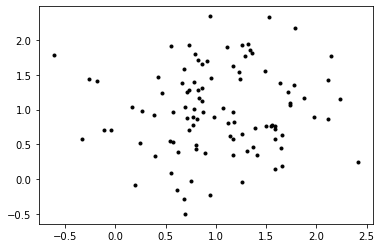

In [133]:
plt.plot(x1[:,0],x1[:,1],'k.')
plt.show()

In [134]:
# We create two more "blobs" like that but with different mean and stdev.
# mean = -1 and stdev = 0.5
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
# mean = -2 and stdev = 0.4
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
print("x3")
print(x3)
#x3=x3+5 # This will add 5 to both columns so that both axes will shift by +5, so that this data is separate from
# the previous data.
#print("x3+5")
print(x3)

x3
[[2.13334541 2.84229944]
 [3.50940795 3.12574878]
 [2.75784404 2.73494776]
 [3.37082539 3.26909308]
 [2.95962078 3.36901136]
 [3.12226177 2.49301548]
 [2.32742167 3.51085393]
 [2.21103918 2.49718928]
 [3.60370923 3.11636637]
 [3.0633228  2.68680622]
 [2.51736858 3.21460255]
 [3.02090887 3.08945679]
 [3.44363461 3.23653395]
 [3.74845612 3.00720299]
 [3.01620798 2.97476248]
 [3.31199562 2.96008191]
 [2.86055131 2.91973265]
 [3.06242162 3.16683299]
 [2.93912848 3.16629274]
 [2.77600314 3.3117103 ]
 [3.4491101  2.5605349 ]
 [2.66997397 2.52670684]
 [3.18385026 3.39699427]
 [2.95068354 3.39188679]
 [2.89466107 2.93907059]
 [2.47459174 2.96036656]
 [2.70713287 2.59706567]
 [2.51726385 1.931096  ]
 [2.83913399 2.93250996]
 [3.47166807 3.47688899]
 [2.96808243 2.31856468]
 [3.07360154 2.40751557]
 [3.46928687 3.33872414]
 [2.44051722 2.96747178]
 [2.14888195 2.57533645]
 [3.34208259 2.72422751]
 [3.46571051 3.1771386 ]
 [3.44816473 3.61763347]
 [2.77807078 2.81070335]
 [2.87375055 2.7578007

In [135]:
# Concatenate all the data along rows i.e. more rows will be added.
X = np.concatenate((x1,x2,x3),axis=0)
print(X)

[[ 1.37273967e+00  4.56896936e-01]
 [ 9.43633295e-01  2.34641015e+00]
 [-4.62307509e-02  7.11603494e-01]
 [ 9.12378151e-01  1.69578862e+00]
 [ 1.74016452e+00  1.06574422e+00]
 [ 1.71258328e+00  1.25055391e+00]
 [ 7.76112382e-01  8.87324842e-01]
 [ 1.32418499e+00  1.94195987e+00]
 [ 1.58805345e+00  5.72211704e-01]
 [ 2.14674766e+00  1.77112592e+00]
 [ 1.95447119e-01 -8.79583683e-02]
 [ 1.58507084e+00  7.21361555e-01]
 [ 1.18382298e+00  8.23930568e-01]
 [ 1.11876843e+00  8.10283585e-01]
 [ 6.96306678e-01 -5.03670857e-01]
 [ 1.64452535e+00  4.40742254e-01]
 [ 1.78064185e+00  1.35265761e+00]
 [ 1.63913118e+00  1.39087151e+00]
 [ 1.26039019e+00  1.93328170e+00]
 [-1.77336596e-01  1.41207415e+00]
 [ 1.33954941e+00  1.85298432e+00]
 [ 8.72403885e-01  9.60605407e-01]
 [ 1.13991675e+00  6.23216892e-01]
 [ 1.50183092e+00  7.58168026e-01]
 [ 1.17287517e+00  9.72618553e-01]
 [ 1.24426466e+00  1.43442738e+00]
 [ 7.99821397e-01  4.84097141e-01]
 [ 1.28607903e+00  1.76620537e+00]
 [ 6.96506680e-01  1

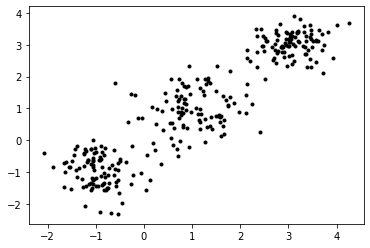

In [136]:
plt.plot(X[:,0],X[:,1],'k.')
plt.show()

In [137]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [138]:
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(X)

KMeans(n_clusters=3)

In [139]:
centroids = k_means.cluster_centers_ # this is a n x 2 array where n is equal to the number of clusters
# 2 means 2 columns, one for X and the other for Y.
labels= k_means.labels_ # this will be a 1-D array containing labels assigned to all the data
print("centroids", centroids)
print("labels", labels)

centroids [[ 1.02283376  0.99046842]
 [-0.93247603 -0.95314449]
 [ 3.05709615  3.02839602]]
labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


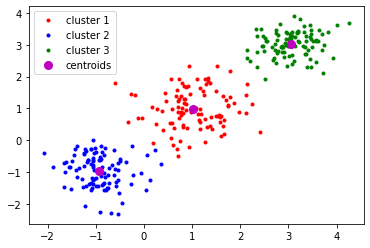

In [140]:
plt.plot(X[labels==0,0],X[labels==0,1],'r.', label='cluster 1')
plt.plot(X[labels==1,0],X[labels==1,1],'b.', label='cluster 2')
plt.plot(X[labels==2,0],X[labels==2,1],'g.', label='cluster 3')
plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8, label='centroids')
plt.legend(loc='best')
plt.show()

In [141]:
#K = range(1,10)
#for n in K:
#  print(n)

In [142]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)
for k in K:
    print(k)
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    # Find the minimum Euclidean distance in each cluster, add for all the clusters.
    distortions.append(sum(np.min(cdist(X, k_means.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    # first min function finds the min distance and accounts for the correct cluster for the observation.
    # sum will add all such distances for which the distance was minimum.
    # cdist: Compute distance between each pair of the two collections of inputs.
    # Here one collection is the original data points. The second collection is cluster centers.
    # Find the distance of points from centroid in each cluster and add all the distances.
    inertias.append(k_means.inertia_)
    # inertia is within-cluster sum-of-squares criterion i.e. sum of square distance between points and centroids.
    mapping1[k] = sum(np.min(cdist(X, k_means.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = k_means.inertia_
    print(mapping1[k]) # Find the minimum Euclidean distance in each cluster, add for all the clusters.
    print(mapping2[k]) # inertia

2
343.4223371260507
478.92018473858195
3
186.23853737493616
149.57140439368362
4
170.11368469043148
123.95091475041082
5
152.89013728364395
104.71172697675183
6
140.52919659932047
87.48133261329721
7
129.43887538099452
74.23471057190876
8
121.68296796564594
65.14890724974485
9
117.02922118223157
59.738729367246336


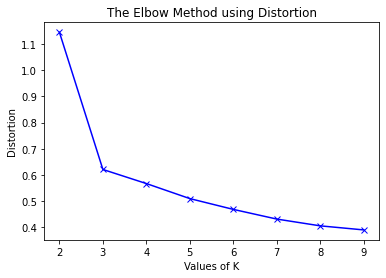

In [143]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [144]:
def train_kmeans(X):
    kmeans = KMeans(n_clusters=3, verbose=2, n_init=1)
    kmeans.fit(X)
    return kmeans

train_kmeans(X)

Initialization complete
Iteration 0, inertia 227.0403473986974
Iteration 1, inertia 150.13127374894322
Iteration 2, inertia 149.6100646631919
Iteration 3, inertia 149.57140439368362
Converged at iteration 3: strict convergence.


KMeans(n_clusters=3, n_init=1, verbose=2)

### Creating data using make_blob function

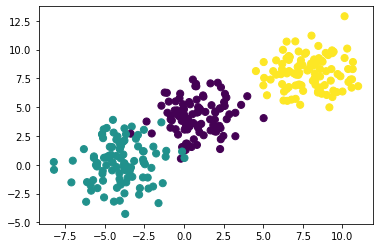

In [148]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers=3, random_state=3, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)#, cmap='RDBu');